<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/%EC%9E%90%EB%8F%99%EB%AF%B8%EB%B6%84%EA%B3%BC_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
w=tf.Variable(2.)

def f(w):
  y=w**2
  z=2*y+5
  return z

In [3]:
with tf.GradientTape() as tape:
  z=f(w)
gradients=tape.gradient(z,[w])
print(gradients)

#w에 대해 미분한 값이 gradient에 저장됨

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [4]:
#자동미분을 이용한 선형회귀 구현
W=tf.Variable(4.0)
b=tf.Variable(1.0) 
#임의값으로 초기화


In [5]:
#가설을 함수로서 정의
@tf.function
def hypothesis(x):
  return W*x+b

In [6]:
#평균제곱오차를 손실함수로서 정의
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred-y))

In [7]:
x=[i for i in range(1,10)]
y=[11,22,33,44,53,66,77,87,95]

In [8]:
# 옵티마이저 = 손실함수 줄이는 최적의 가중치 찾기 위해 사용하는 알고리즘
optimizer=tf.optimizers.SGD(0.01) # 학습률


In [9]:
#300번 걸친 경사하강법
for i in range(301):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
     y_pred=hypothesis(x)
     #평균 제곱 오차 계산
     cost=mse_loss(y_pred, y)
  #손실함수에 대한 파라미터의 미분값 계산
  gradients=tape.gradient(cost, [W,b])
  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W,b]))
  if i %10==0:
    print("epoch : {:3} | W의 값 : {:5.4f} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | cost : 1.664444
epoch :  10 | W의 값 : 10.4971 | cost : 1.976931
epoch :  20 | W의 값 : 10.5047 | cost : 1.929707
epoch :  30 | W의 값 : 10.5119 | cost : 1.884377
epoch :  40 | W의 값 : 10.5188 | cost : 1.840875
epoch :  50 | W의 값 : 10.5254 | cost : 1.799127
epoch :  60 | W의 값 : 10.5318 | cost : 1.759063
epoch :  70 | W의 값 : 10.5379 | cost : 1.720614
epoch :  80 | W의 값 : 10.5438 | cost : 1.683716
epoch :  90 | W의 값 : 10.5494 | cost : 1.648305
epoch : 100 | W의 값 : 10.5548 | cost : 1.614323
epoch : 110 | W의 값 : 10.5600 | cost : 1.581710
epoch : 120 | W의 값 : 10.5650 | cost : 1.550413
epoch : 130 | W의 값 : 10.5697 | cost : 1.520378
epoch : 140 | W의 값 : 10.5743 | cost : 1.491554
epoch : 150 | W의 값 : 10.5787 | cost : 1.463892
epoch : 160 | W의 값 : 10.5829 | cost : 1.437345
epoch : 170 | W의 값 : 10.5870 | cost : 1.411870
epoch : 180 | W의 값 : 10.5909 | cost : 1.387421
epoch : 190 | W의 값 : 10.5946 | cost : 1.363958
epoch : 200 | W의 값 : 10.5982 | cost : 1.341441
epoch : 210 | 

In [10]:
#학습된 가중치에 대해 임의 입력을 넣었을 경우의 예측값을 확인
x_test=[3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [11]:
#케라스로 구하는 선형회귀

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
#x,y 그대로 씀
model=Sequential()
#입력 x의 차원은 1, 출력 y의 차원도 1, 선형회귀이므로  activation은 linear
model.add(Dense(1, input_dim=1, activation='linear'))
#sgd는 경사하강법을 의미. 학습률은 0.01
sgd=optimizers.SGD(lr=0.01)
#손실함수는 평균제곱오차 mse를 사용
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
#주어진 x와 y에 대해 오차 최소화하는 작업 300번 시도
model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


9/9 [==============================] - 0s 2ms/step - loss: 479.0753 - mse: 479.0753
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.5145 - mse: 2.5145
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4997 - mse: 2.4997
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4856 - mse: 2.4856
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4721 - mse: 2.4721
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4592 - mse: 2.4592
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4468 - mse: 2.4468
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4350 - mse: 2.4350
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4237 - mse: 2.4237
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4130 - mse: 2.4130
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4026 - mse: 2

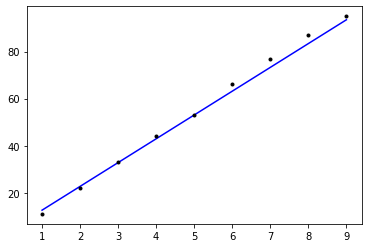

In [13]:
#옵티마이저로 경사하강법 사용하고 싶으면 sgd라고 기재
#학습률은 0.01

#최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보기
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b', x,y,'k.')

#각 점은 우리가 실제 주었던 실제값이고 직선은 실제값으로부터 오차를 최소화하는 기울기와 편향을 가진 직선


In [14]:
#예측
print(model.predict([9.5]))


[[98.55645]]
